In [106]:
import pandas as pd

In [108]:
af = pd.read_csv('../year_end_audio_features.csv')

In [109]:
af.columns.tolist()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [110]:
af[af.liveness == af['liveness'].max()] 
#it actually is a live recording so we'll keep this column

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
515,0.404,0.914,7,-3.043,1,0.096,0.0418,0.0,0.981,0.366,91.944,audio_features,5SDxsjvegCAJwfQjFmc4WY,spotify:track:5SDxsjvegCAJwfQjFmc4WY,https://api.spotify.com/v1/tracks/5SDxsjvegCAJ...,https://api.spotify.com/v1/audio-analysis/5SDx...,243333,4


In [111]:
af[af.speechiness == af.speechiness.max()] 
#anything above a 0.66 is considered to be a podcast or some sort of speaking rather than music so this seems right

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
945,0.573,0.495,8,-7.245,0,0.592,0.405,0.0,0.0969,0.255,179.196,audio_features,4MRT0dDbhqFKl67WzhUbSw,spotify:track:4MRT0dDbhqFKl67WzhUbSw,https://api.spotify.com/v1/tracks/4MRT0dDbhqFK...,https://api.spotify.com/v1/audio-analysis/4MRT...,312027,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192AFBDE580>]],
      dtype=object)

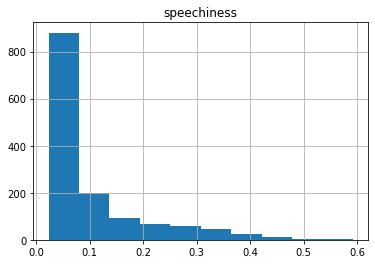

In [112]:
# af.speechiness.mean()
af.hist(column='speechiness')

In [113]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(af)
# profile

In [114]:
af[af.loudness == af.loudness.min()] 
#okay so 0 is the loudest and -60 is quietest

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
972,0.213,0.0743,9,-18.071,0,0.0408,0.344,0.000034,0.212,0.145,53.863,audio_features,416MsJxvxSKY96DCmbJIRs,spotify:track:416MsJxvxSKY96DCmbJIRs,https://api.spotify.com/v1/tracks/416MsJxvxSKY...,https://api.spotify.com/v1/audio-analysis/416M...,218507,4


### Vibe
        what's our vibe? a bop, upbeat, lots of bass, with some rap? (danceability, energy/tempo, loudness, speechiness)
tutorial here: https://www.python-graph-gallery.com/390-basic-radar-chart

In [115]:
#set up dataframe for radar chart
rdf = af.get(['danceability', 'energy', 'speechiness', 'tempo', 'loudness'])

In [116]:
# y axes need to be somewhat normalized
rdf.min(axis=0)
# rdf.max(axis=0)

danceability     0.1620
energy           0.0565
speechiness      0.0231
tempo           53.8630
loudness       -18.0710
dtype: float64

In [117]:
from sklearn.preprocessing import MinMaxScaler
# scales each feature to fit a 0-1 scale
data = (rdf.get(['tempo','loudness','speechiness']))
scaler = MinMaxScaler(clip=False)
print(scaler.fit(data))

MinMaxScaler()


In [118]:
print(scaler.data_max_)

[210.857  -1.19    0.592]


In [119]:
scaledy = pd.DataFrame(scaler.transform(data).tolist())

In [120]:
rdf = pd.concat([scaledy,rdf],axis=1,join='outer').drop(['tempo','loudness','speechiness'],axis=1).rename({0:'tempo',1:'loudness',2:'speechiness'},axis=1)

In [121]:
rdf.speechiness.mode()

0    0.035331
dtype: float64

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [123]:
# number of variables
categories = list(rdf)
N = len(categories)

In [124]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=rdf.loc[0].values.flatten().tolist()
values += values[:1]
values

[0.5489572849917831,
 0.8327705704638351,
 0.013710669713482164,
 0.599,
 0.785,
 0.5489572849917831]

In [125]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

In [132]:
categories = list(rdf)
mean = rdf.mean()


In [134]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
  r=mean,
  theta=categories,
    line=dict(color='#afdfdd',dash='solid',width=3),
  fill='toself',
    fillcolor='#d2e174',
    opacity=0.8,
    marker=dict(color='#afdfdd',size=10),
#     blarg=1,
    connectgaps=True,
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
        range=[0,0.8],
        color='#181818',
        gridcolor='#181818',
        showline=False,
        gridwidth=1,
        layer='below traces',
        linecolor='#181818',
        dtick=0.2
    ),
  ),
  showlegend=False
)

# fig.add_trace(go.Scatterpolar(
#     r=[0.8,0.8,0.8,0.8,0.8],
#     theta=categories,
#     mode='text',
#     text=['Tempo','Loudness','Speechiness','Danceability','Energy'],
#     textposition='top center',
#     textfont=dict(
#         size=20),
#     showlegend=False
# ))

fig.show()

# import chart_studio.plotly as py
# py.plot(fig, filename = 'past_spider', auto_open=True)

'https://plotly.com/~zylstraa/33/'

### Mood 
        plotting energy vs valence
        high energy, valence = happy
        low energy, valence = sad
        high energy, low valence = angsty
        low energy, high valence = chill

In [102]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=af.valence, y=af.energy,
                    mode='markers',
                    name='markers',
                        showlegend=False,
                        marker = dict(color='#d2e174')
                        ))
fig.add_shape(type='line',
                x0=0,
                y0=0.5,
                x1=1,
                y1=0.5,
                line=dict(color='#afdfdd',),
                xref='x',
                yref='y'
)

fig.add_shape(type='line',
                x0=0.5,
                y0=0,
                x1=0.5,
                y1=1,
                line=dict(color='#afdfdd',),
                xref='x',
                yref='y'
)

#Add 4 song annotations

fig.add_trace(go.Scatter(
    x=[0.0386, 0.0765, 0.919,0.816],
    y=[.866,0.147,0.924,0.315],
    mode='markers+text',
    text=['Animals <br> Martin Garrix','Say Something<br>Christina Aguilera &<br> A Great Big World',
         'Feel So Close <br> Calvin Harris','Lost Without U <br> Robin Thicke'],
    textposition=['top center', 'bottom center','top center','bottom center'],
    showlegend = False,
    marker = dict(color = '#ec5b68',)

))

fig.add_trace(go.Scatter(
    x=[.8,0.2,0.2,0.8],
    y=[1,0,1,0],
    mode='text',
    text=['Happy','Sad','Angry/Angsty','Peaceful'],
    textposition='top center',
    textfont=dict(
        size=16),
    showlegend=False
))

fig.show() #hit songs have no chill

import chart_studio.plotly as py
py.plot(fig, filename = 'past_audiofeatures', auto_open=True)

'https://plotly.com/~zylstraa/25/'

In [22]:
# af[(af.energy==.866) & (af.valence == 0.0386)] #angry Animals by Martin Garrix spotify:track:6JEntXLt4z98CcDtIH9sU7
# af[(af.energy==.147) & (af.valence == 0.0765)] #sad Say Something by Christina Aguilera and A Great Big World spotify:track:6Vc5wAMmXdKIAM7WUoEb7N
# af[(af.energy==.924) & (af.valence == 0.919)] #happy, upbeat Feel So Close by Calvin Harris spotify:track:1gihuPhrLraKYrJMAEONyc
# af[(af.energy==.351) & (af.valence == 0.816)] #chill Lost Without U by Robin Thicke spotify:track:4V2F0DZrAXOWq9hkwMMG3x

### Composition

Might make a graphic of the following below in PhotoShop

In [23]:
af['mode'].value_counts() #1 is major key, 0 is minor key

1    887
0    500
Name: mode, dtype: int64

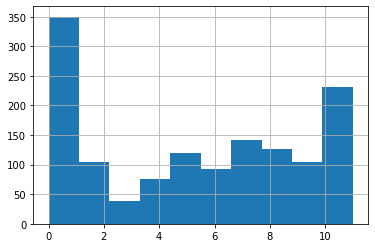

In [24]:
af.key.hist() # 0 is C, 11 is B

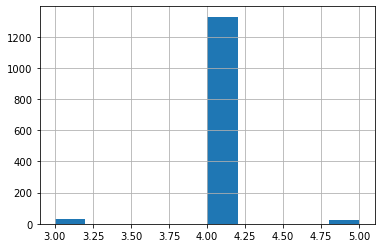

In [25]:
af.time_signature.hist() #okay it's almost always in 4/4 time

In [26]:
af.duration_ms.describe() #3.5 to 4 minutes is the sweet spot

count      1387.000000
mean     226931.108147
std       39016.111806
min       78200.000000
25%      203573.500000
50%      223190.000000
75%      243653.500000
max      688453.000000
Name: duration_ms, dtype: float64

In [27]:
ac = af[af.acousticness >= 0.7].sort_values(by='acousticness')#tried various cut off points and 0.7 seems to be the most accurate
len(ac)/len(af)*100 # only 2% are acoustic

2.235039653929344

In [28]:
ins = af[af.instrumentalness > 0.5].sort_values(by='instrumentalness') #it seems anything above 0.5 is mostly instrumental
len(ins)/len(af)*100 # only 0.4% are mostly instrumental

0.3604902667627974